In [2]:
import schedule
import time
import datetime as dt
import logging
import pandas as pd
import numpy as np
import pytz
import sqlite3
import sqlalchemy

db_data_path = r'/Users/pankajti/dev/git/wqu/capstone/data/db/capstone.db'
con = sqlite3.connect(db_data_path)
dbEngine = sqlalchemy.create_engine(f'sqlite:///{db_data_path}')


trades = pd.read_sql("select * from trades where strategy ='opening_range_breakout' and version = 1714233201 ",dbEngine)


/var/folders/tz/k1k21d6x7j1d90h0t6dqf5yc0000gn/T/ipykernel_67404/2304959270.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
trades.head()

,trade_time,ticker,side,quantity,price,strategy,creatime,version
0,2024-03-26 09:54:00+05:30,ITC.NS,1,1,428.799987792969,opening_range_breakout,2024-04-27 23:53:31.972306,1714233201
1,2024-03-26 09:54:00+05:30,LT.NS,1,1,3618.0,opening_range_breakout,2024-04-27 23:53:31.972306,1714233201
2,2024-03-26 09:54:00+05:30,BAJFINANCE.NS,1,1,6928.2001953125,opening_range_breakout,2024-04-27 23:53:31.972306,1714233201
3,2024-03-26 09:54:00+05:30,KOTAKBANK.NS,-1,-1,1765.55004882813,opening_range_breakout,2024-04-27 23:53:31.972306,1714233201
4,2024-03-26 09:54:00+05:30,NTPC.NS,1,1,326.0,opening_range_breakout,2024-04-27 23:53:31.972306,1714233201


In [4]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311854 entries, 0 to 311853
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   trade_time  311854 non-null  object
 1   ticker      311854 non-null  object
 2   side        311854 non-null  object
 3   quantity    311854 non-null  object
 4   price       311854 non-null  object
 5   strategy    311854 non-null  object
 6   creatime    311854 non-null  object
 7   version     311854 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 19.0+ MB


In [5]:
trades.describe()

,version
count,3.118540e+05
mean,1.714233e+09
std,0.000000e+00
min,1.714233e+09
25%,1.714233e+09
50%,1.714233e+09
75%,1.714233e+09
max,1.714233e+09


In [6]:
trades['tdate'] = trades.trade_time.str[:10]

In [7]:
trades.sort_values('ticker')

,trade_time,ticker,side,quantity,price,strategy,creatime,version,tdate
279139,2024-04-25 14:09:00.000000,20MICRONS.NS,-1,-2097152.0,158.649993896484,opening_range_breakout,2024-04-28 00:48:28.892282,1714233201,2024-04-25
304550,2024-04-26 14:04:00.000000,20MICRONS.NS,-1,-131072.0,161.449996948242,opening_range_breakout,2024-04-28 00:50:12.802989,1714233201,2024-04-26
237683,2024-04-23 14:24:00.000000,20MICRONS.NS,-1,-8192.0,152.5,opening_range_breakout,2024-04-28 00:45:07.236228,1714233201,2024-04-23
91284,2024-04-01 15:04:00+05:30,20MICRONS.NS,sell,1.0,147.300003051758,opening_range_breakout,2024-04-28 00:13:38.250431,1714233201,2024-04-01
12801,2024-03-26 13:29:00+05:30,20MICRONS.NS,-1,-1024.0,144.199996948242,opening_range_breakout,2024-04-27 23:56:39.556934,1714233201,2024-03-26
...,...,...,...,...,...,...,...,...,...
74239,2024-03-28 14:24:00+05:30,ZYDUSWELL.NS,-1,-4194304.0,1472.09997558594,opening_range_breakout,2024-04-28 00:07:52.404384,1714233201,2024-03-28
69591,2024-03-28 13:34:00+05:30,ZYDUSWELL.NS,-1,-32768.0,1477.44995117188,opening_range_breakout,2024-04-28 00:07:06.897466,1714233201,2024-03-28
239957,2024-04-23 14:59:00.000000,ZYDUSWELL.NS,-1,-4194304.0,1632.94995117188,opening_range_breakout,2024-04-28 00:45:17.343783,1714233201,2024-04-23
169163,2024-04-16 09:54:00+05:30,ZYDUSWELL.NS,1,1.0,1610.0,opening_range_breakout,2024-04-28 00:34:35.178884,1714233201,2024-04-16


In [8]:
trades_data = trades[['tdate', 'ticker', 'side','quantity' , 'price']]

In [9]:
trades_data['price'] = trades_data.price.astype(float)

/var/folders/tz/k1k21d6x7j1d90h0t6dqf5yc0000gn/T/ipykernel_67404/686818239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trades_data['price'] = trades_data.price.astype(float)


In [10]:
#trades_data['side'] =  trades_data.apply(lambda x : 1 if x['side']=='buy' else -1, axis =1 )*trades_data.quantity.astype(float)

In [11]:
#trades_data['trades_cost'] = trades_data['side']*trades_data.price

In [12]:
trades_data= trades_data.pivot_table(index= ['tdate','ticker'], columns =['side'], values=['price'] )

In [13]:
trades_data=trades_data.T.reset_index().T.reset_index()[2:].rename({0:'buy',1:'sell'},axis=1).dropna()

In [14]:
trades_data['ret']=(trades_data.sell-trades_data.buy)/trades_data.buy

In [15]:
trades_data['ret_perc']=100*((trades_data.sell-trades_data.buy)/trades_data.buy)

In [16]:
trades_data['tc']=.005*(trades_data.buy+trades_data.sell)

In [17]:
trades_data['ret_perc_ac']=100*((trades_data.sell-trades_data.buy-trades_data.tc)/trades_data.buy)

In [18]:
trades_data

,tdate,ticker,buy,sell,2,ret,ret_perc,tc,ret_perc_ac
2,2024-03-26,20MICRONS.NS,143.94375,147.050003,143.199997,0.02158,2.157963,1.454969,1.147173
12,2024-03-26,AARON.NS,255.175003,260.0,255.199997,0.018909,1.890858,2.575875,0.881404
15,2024-03-26,AARTIIND.NS,651.216654,657.299988,657.849976,0.009341,0.934149,6.542583,-0.070522
47,2024-03-26,AIAENG.NS,3755.923105,3805.525024,3805.674927,0.013206,1.320632,37.807241,0.314029
75,2024-03-26,AMRUTANJAN.NS,604.014282,608.183329,608.5,0.006902,0.690223,6.060988,-0.313228
...,...,...,...,...,...,...,...,...,...
24237,2024-04-26,YATHARTH.NS,441.633335,446.283335,448.800003,0.010529,1.05291,4.439583,0.047645
24240,2024-04-26,ZAGGLE.NS,298.076084,305.050003,306.125,0.023396,2.339644,3.01563,1.327946
24248,2024-04-26,ZIMLAB.NS,121.071427,124.900002,122.599998,0.031622,3.162244,1.229857,2.146433
24251,2024-04-26,ZOTA.NS,483.783335,489.75,487.525009,0.012333,1.233334,4.867667,0.227167


<Axes: xlabel='tdate'>

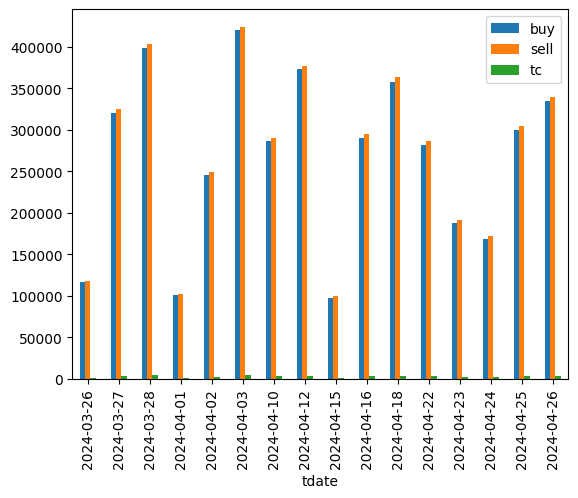

In [19]:
daily_return = trades_data.groupby('tdate').sum()[['buy','sell','tc']]
daily_return.plot(kind='bar')

In [20]:
daily_return

,buy,sell,tc
tdate,,,
2024-03-26,116030.329424,118238.058563,1171.34194
2024-03-27,319976.335578,325437.726037,3227.070308
2024-03-28,398112.46022,403430.381308,4007.714208
2024-04-01,100570.037856,102416.266881,1014.931524
2024-04-02,245017.831896,248867.384158,2469.42608
2024-04-03,419828.584259,424195.267806,4220.11926
2024-04-10,286214.988697,290528.091481,2883.715401
2024-04-12,372825.936413,376958.776634,3748.923565
2024-04-15,97670.635672,99245.874699,984.582552


In [21]:
daily_return['per_ret_bc'] = 100*((daily_return.sell-daily_return.buy)/daily_return.buy)
daily_return['per_ret_ac'] = 100*((daily_return.sell-daily_return.buy-daily_return.tc)/daily_return.buy)

In [22]:
daily_return.per_ret_ac.std()

0.2396487597798924

In [23]:
daily_return.per_ret_ac.mean()

0.5461681803308448

<Axes: xlabel='tdate'>

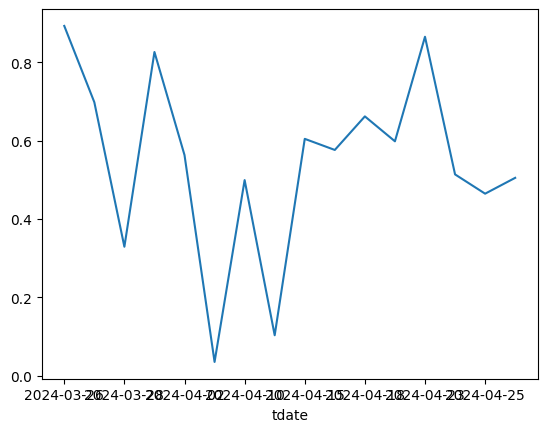

In [24]:
daily_return.per_ret_ac.plot()

<Axes: xlabel='tdate'>

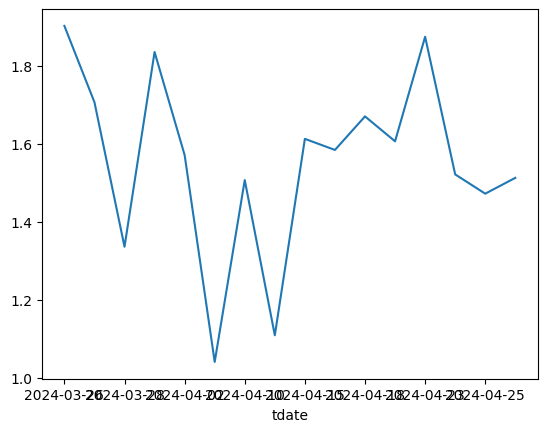

In [25]:
daily_return.per_ret_bc.plot()

In [26]:
daily_return.per_ret_ac.mean()/daily_return.per_ret_ac.std()

2.2790361228344267

In [27]:
cum_ret_bc= (1+daily_return.per_ret_ac).cumprod()
cum_ret_bc[-1]

/var/folders/tz/k1k21d6x7j1d90h0t6dqf5yc0000gn/T/ipykernel_67404/3514087353.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cum_ret_bc[-1]


873.9345216968709

In [28]:
cum_ret_bc= (1+daily_return.per_ret_bc).cumprod()
cum_ret_bc[-1]

/var/folders/tz/k1k21d6x7j1d90h0t6dqf5yc0000gn/T/ipykernel_67404/305887988.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cum_ret_bc[-1]


3053800.621350969

In [29]:
daily_return.per_ret_bc.mean()/daily_return.per_ret_bc.std()

6.451809647381186

In [30]:
daily_return.mean()

buy           267279.104389
sell          271262.039943
tc              2692.705722
per_ret_bc         1.553938
per_ret_ac         0.546168
dtype: object

In [31]:
sharpe_ratio = daily_return.mean()/daily_return.std()
print(f" Sharpe ratio::  {sharpe_ratio}")

 Sharpe ratio::  buy           2.547694
sell          2.557213
tc             2.55249
per_ret_bc     6.45181
per_ret_ac    2.279036
dtype: object


In [32]:
import matplotlib.pyplot as plt

In [33]:
#opening_range_breakout

## Plt maxdrawdown

In [34]:
n=20
xs = daily_return.cumsum()
i = np.argmax(np.maximum.accumulate(xs) - xs) # end of the period
j = np.argmax(xs[:i]) # start of period



ValueError: attempt to get argmax of an empty sequence

In [ ]:
xs.plot()

In [ ]:
xs[j]-xs[i]